### **Through Google Colab**

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files      
from os import listdir

Images being imported 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2021-04-07 21_36_40_exai_rpi_004_51.jpg to 2021-04-07 21_36_40_exai_rpi_004_51 (1).jpg
Saving 2021-04-07 21_37_18_exai_rpi_001_58.jpg to 2021-04-07 21_37_18_exai_rpi_001_58 (1).jpg
Saving 2021-04-07 21_39_06_exai_rpi_001_85.jpg to 2021-04-07 21_39_06_exai_rpi_001_85 (1).jpg
Saving 2021-04-07 21_39_20_exai_rpi_004_91.jpg to 2021-04-07 21_39_20_exai_rpi_004_91 (1).jpg
Saving 2021-04-07 21_40_10_exai_rpi_001_101.jpg to 2021-04-07 21_40_10_exai_rpi_001_101 (1).jpg
Saving 2021-04-07 21_43_40_exai_rpi_004_156.jpg to 2021-04-07 21_43_40_exai_rpi_004_156 (1).jpg
Saving 2021-04-07 21_45_00_exai_rpi_004_176.jpg to 2021-04-07 21_45_00_exai_rpi_004_176 (1).jpg


Checking whether it is working


<class 'PIL.JpegImagePlugin.JpegImageFile'>


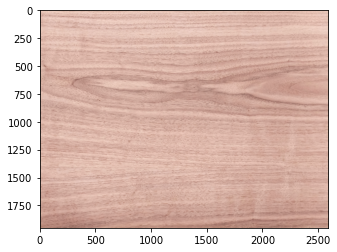

In [3]:
img = load_img('2021-04-07 21_37_18_exai_rpi_001_58.jpg')
print(type(img))

plt.imshow(img)
plt.show()


Converting all the images to arrays and appending them to images list

In [4]:
images = []

for fn in uploaded.keys():
  img1 = load_img(fn)
  images.append(img_to_array(img1))
images = np.array(images)
images.shape

(7, 1952, 2592, 3)

Autoencoder Deep Learning model.

Technique I am using is Autoencoder. Autoencoder model is learned to give the same output as input and if there is some anomaly in input, model should give other output. This can be done by losing some information. Autoencoder model loses some information that is not important. when the output is compared with the input and both are subtracted, difference could be seen. Values with higher difference would show model couldn't predict and there should be anomaly. 
Example would be suppose input is a list <br> <br>
input = [1,2,3,4,5,18,7,8,9,10] <br> <br>
Model would output <br> <br>
output = [1,2,3,4,5,10,7,8,9,10] <br> <br>
difference between two list would be <br> <br>
diff = [0,0,0,0,0,8,0,0,0,0] <br><br>
here we know where the anomaly is and how big it is. <br><br>
Same idea is used here.

In [5]:
input = layers.Input(shape=(1952, 2592, 3))

x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((4, 4), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=4, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1952, 2592, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1952, 2592, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 488, 648, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 488, 648, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 244, 324, 32)      0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 976, 1296, 32)     9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 1952, 2592, 32)    9248  

In [6]:
autoencoder.fit(
    x=images/255,
    y=images/255,
    epochs=100,
    batch_size=2,
)


Epoch 1/100
4/4 [==============================] - 18s 2s/step - loss: 0.1034
Epoch 2/100
4/4 [==============================] - 2s 496ms/step - loss: 0.0948
Epoch 3/100
4/4 [==============================] - 2s 499ms/step - loss: 0.0759
Epoch 4/100
4/4 [==============================] - 2s 471ms/step - loss: 0.0423
Epoch 5/100
4/4 [==============================] - 2s 492ms/step - loss: 0.0218
Epoch 6/100
4/4 [==============================] - 2s 471ms/step - loss: 0.0213
Epoch 7/100
4/4 [==============================] - 2s 489ms/step - loss: 0.0185
Epoch 8/100
4/4 [==============================] - 2s 475ms/step - loss: 0.0135
Epoch 9/100
4/4 [==============================] - 2s 484ms/step - loss: 0.0120
Epoch 10/100
4/4 [==============================] - 2s 484ms/step - loss: 0.0101
Epoch 11/100
4/4 [==============================] - 2s 489ms/step - loss: 0.0087
Epoch 12/100
4/4 [==============================] - 2s 484ms/step - loss: 0.0082
Epoch 13/100
4/4 [=====================

Lets check with an example

Original Image

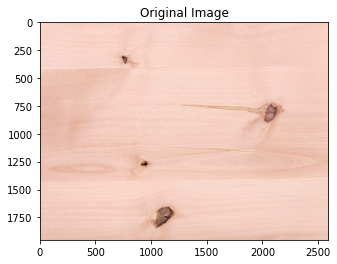

In [7]:
plt.imshow(images[2]/255)
plt.title("Original Image")
plt.show()


Array of predicted image

In [8]:
prediction = autoencoder.predict(images[[2]]/255)
prediction

array([[[[0.88912153, 0.7614357 , 0.70276064],
         [0.90584505, 0.7651775 , 0.7101038 ],
         [0.9084936 , 0.76193196, 0.7088614 ],
         ...,
         [0.92308784, 0.7808375 , 0.7238078 ],
         [0.91622293, 0.78337467, 0.7259038 ],
         [0.7824166 , 0.68780607, 0.63429844]],

        [[0.90440774, 0.76724607, 0.70696676],
         [0.9181249 , 0.7713698 , 0.71957797],
         [0.916762  , 0.7708861 , 0.7112953 ],
         ...,
         [0.9381315 , 0.79305595, 0.73801893],
         [0.93450236, 0.7938129 , 0.7361439 ],
         [0.7936387 , 0.7068317 , 0.61934453]],

        [[0.90594864, 0.76335096, 0.7017814 ],
         [0.9186001 , 0.77396876, 0.71083605],
         [0.9201583 , 0.7681688 , 0.7108161 ],
         ...,
         [0.93807244, 0.79467565, 0.730434  ],
         [0.9350589 , 0.79524314, 0.7316905 ],
         [0.79170513, 0.6505601 , 0.6784966 ]],

        ...,

        [[0.79943323, 0.66963714, 0.6249759 ],
         [0.8089154 , 0.66853887, 0.62292665]

Predicted image

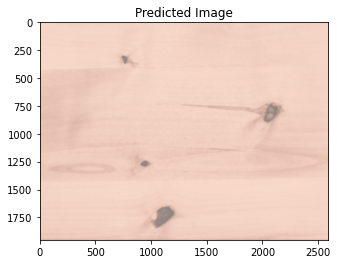

In [9]:
plt.imshow(prediction[0])
plt.title("Predicted Image")
plt.show()

Here you can see anomalies clearly present

In [10]:
## Anomalies can be checked by comparing two images. Differences between two images could be anomaly

Anomaly_process = prediction[0]-images[2]/255


## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0



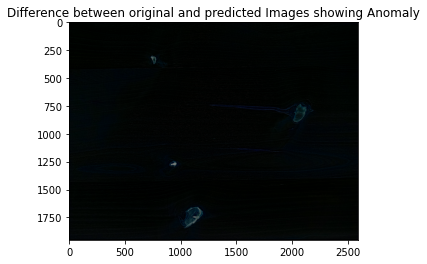

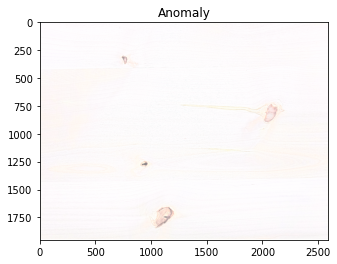

In [11]:

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


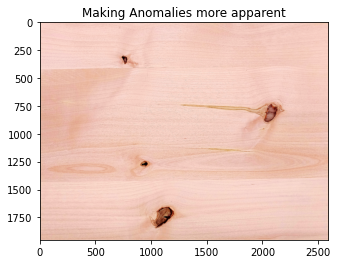

In [12]:
## Making anomalies more apparent in original image
plt.imshow(images[2]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()


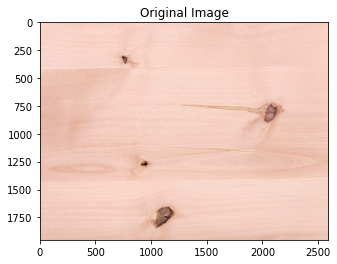

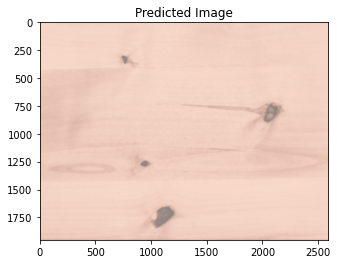

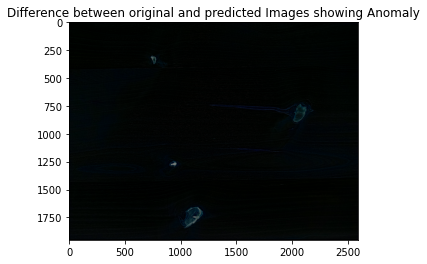

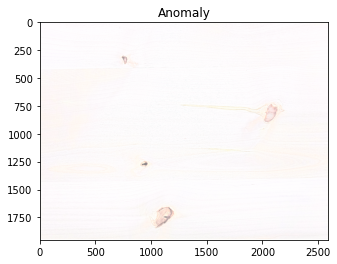

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


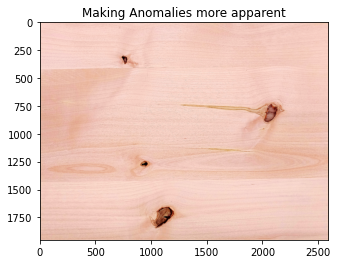

In [13]:
plt.imshow(images[2]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[2]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()




### **Now lets go through all seven images**

Image1

Image 1 doesnot seems to have anomalies

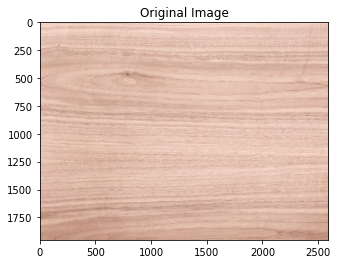

In [14]:
plt.imshow(images[0]/255)
plt.title("Original Image")
plt.show()


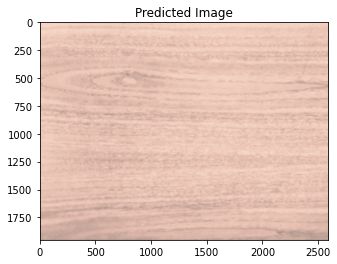

In [15]:
prediction0 = autoencoder.predict(images[[0]]/255)
plt.imshow(prediction0[0])
plt.title("Predicted Image")
plt.show()

Looks like no distinct spots, although there are lines. 

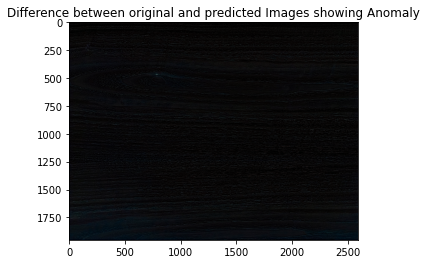

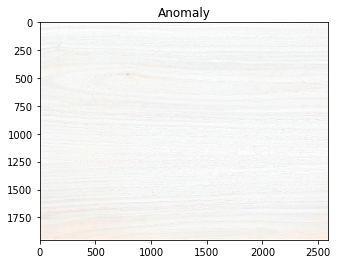

In [16]:
Anomaly_process = prediction0[0]-images[0]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0



plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()


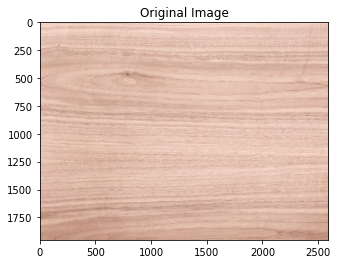

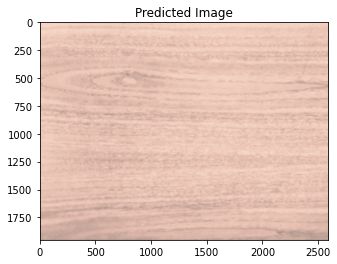

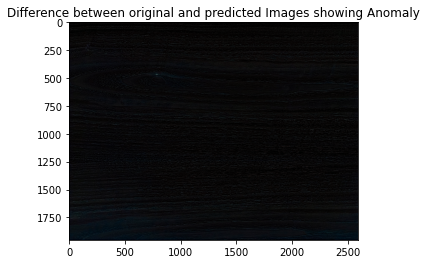

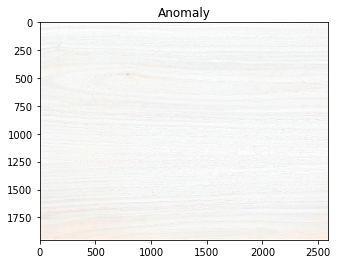

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


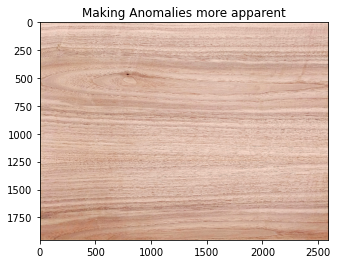

In [17]:
plt.imshow(images[0]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction0[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[0]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

Image 2

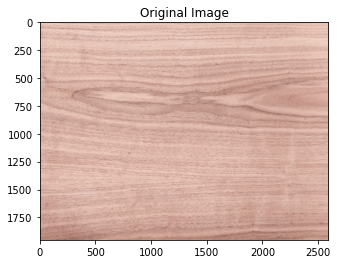

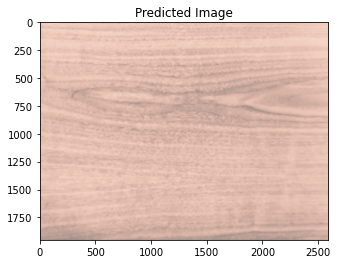

In [18]:
plt.imshow(images[1]/255)
plt.title("Original Image")
plt.show()

prediction1 = autoencoder.predict(images[[1]]/255)
plt.imshow(prediction1[0])
plt.title("Predicted Image")
plt.show()

Although lines are visible, no clear spots are visible

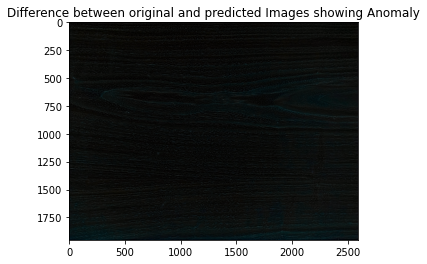

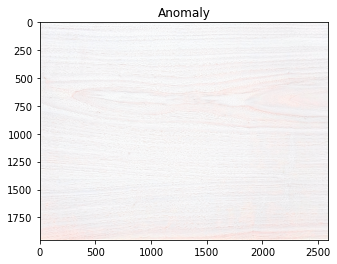

In [19]:
Anomaly_process = prediction1[0]-images[1]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0



plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

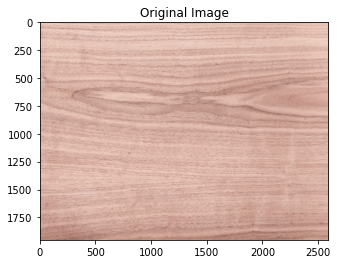

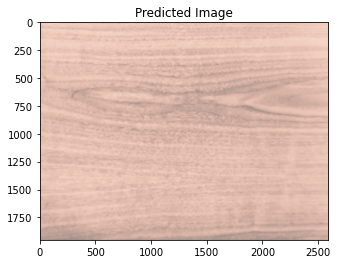

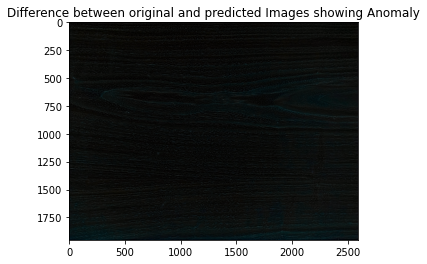

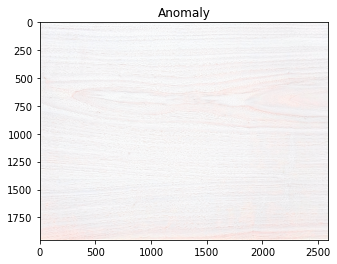

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


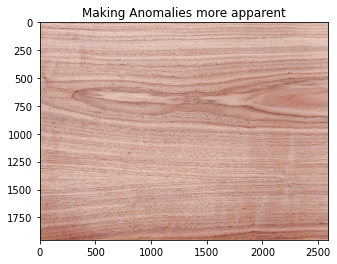

In [20]:
plt.imshow(images[1]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction1[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[1]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

Image 3. Same image previously analyzed

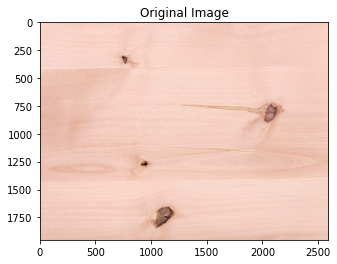

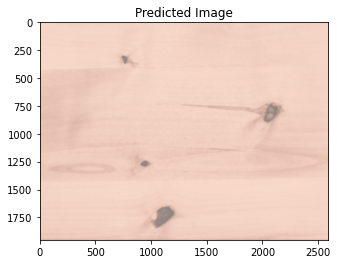

In [21]:
plt.imshow(images[2]/255)
plt.title("Original Image")
plt.show()

prediction2 = autoencoder.predict(images[[2]]/255)
plt.imshow(prediction2[0])
plt.title("Predicted Image")
plt.show()

Anomaly spots clearly visible

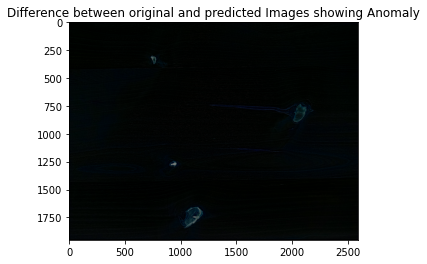

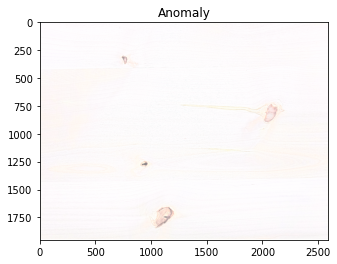

In [22]:
Anomaly_process = prediction2[0]-images[2]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0


plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()


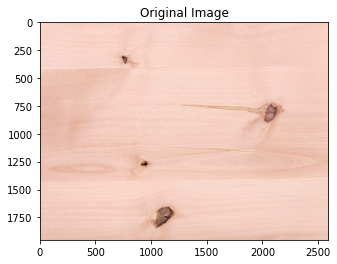

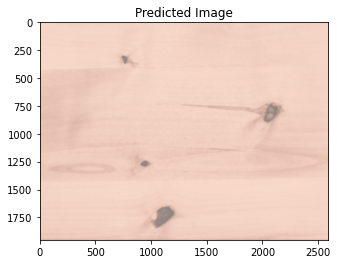

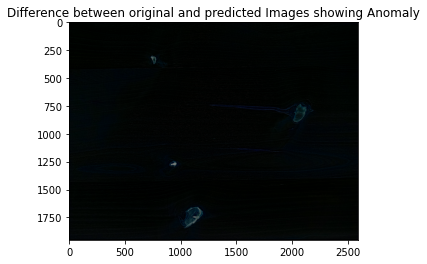

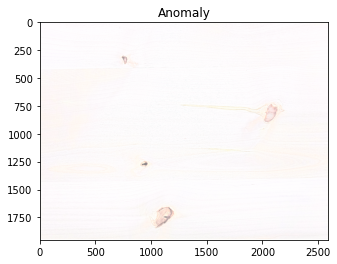

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


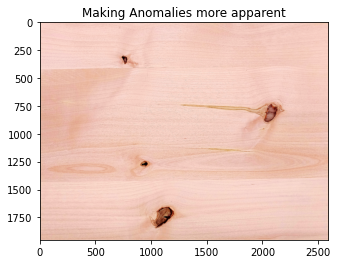

In [23]:
plt.imshow(images[2]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction2[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[2]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

Image 4

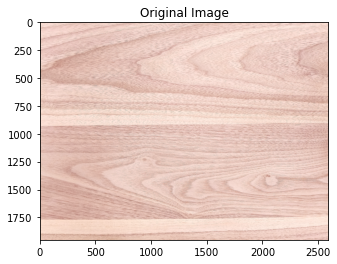

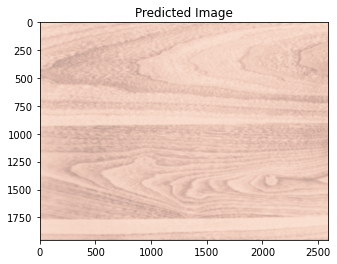

In [24]:
plt.imshow(images[3]/255)
plt.title("Original Image")
plt.show()

prediction3 = autoencoder.predict(images[[3]]/255)
plt.imshow(prediction3[0])
plt.title("Predicted Image")
plt.show()

Lines present but no clear spots

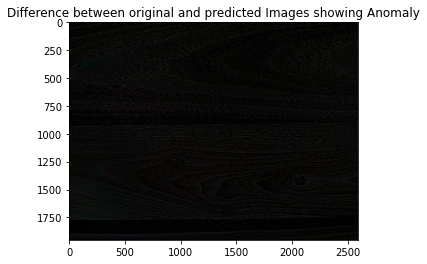

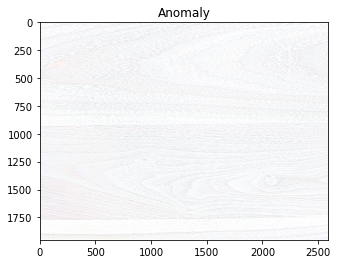

In [25]:
Anomaly_process = prediction3[0]-images[3]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0


plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()


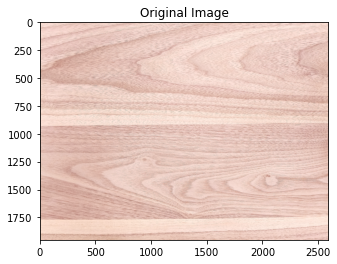

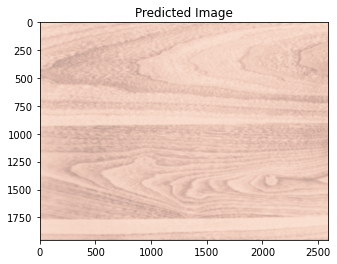

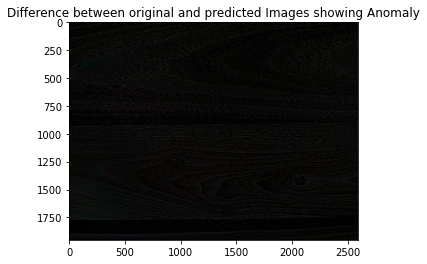

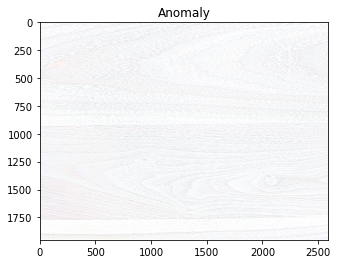

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


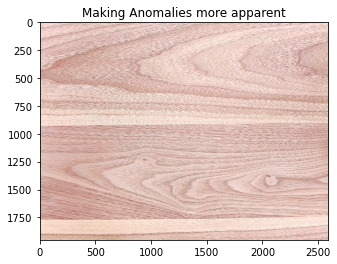

In [26]:
plt.imshow(images[3]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction3[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[3]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

Image 5

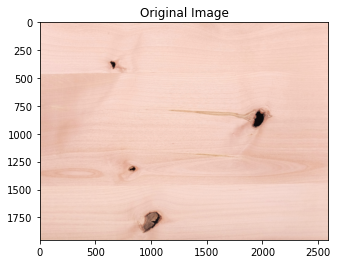

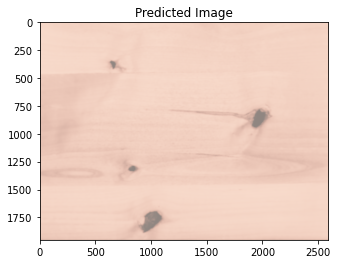

In [27]:
plt.imshow(images[4]/255)
plt.title("Original Image")
plt.show()

prediction4 = autoencoder.predict(images[[4]]/255)
plt.imshow(prediction4[0])
plt.title("Predicted Image")
plt.show()

Spots clearly present

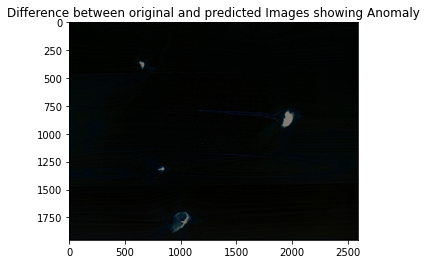

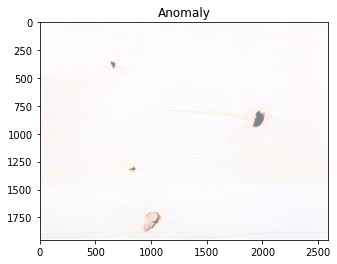

In [28]:
Anomaly_process = prediction4[0]-images[4]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0


plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

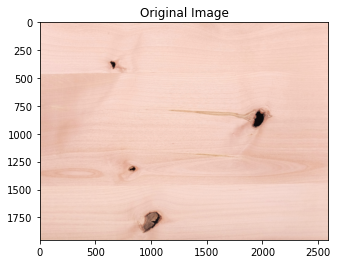

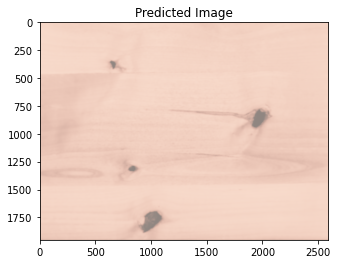

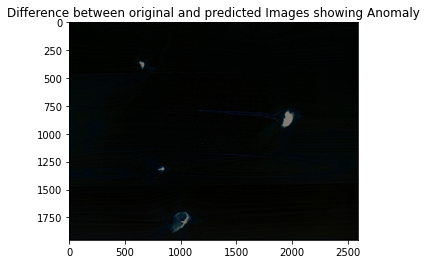

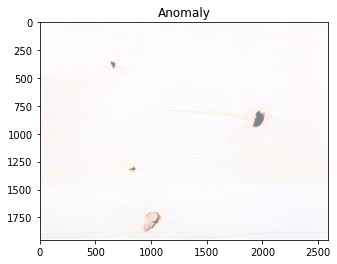

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


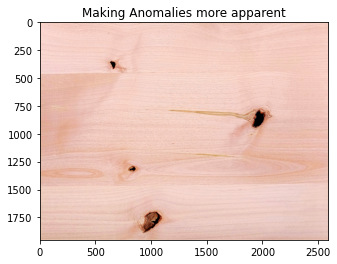

In [29]:
plt.imshow(images[4]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction4[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[4]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

Image 6

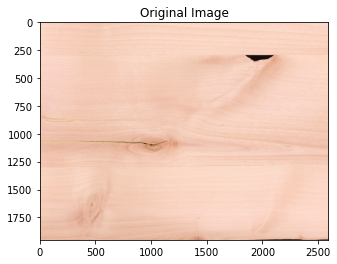

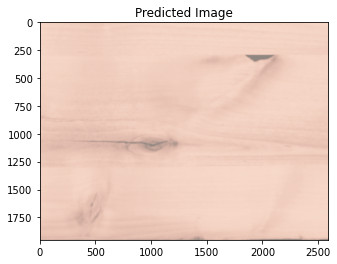

In [30]:
plt.imshow(images[5]/255)
plt.title("Original Image")
plt.show()

prediction5 = autoencoder.predict(images[[5]]/255)
plt.imshow(prediction5[0])
plt.title("Predicted Image")
plt.show()

spots clearly present

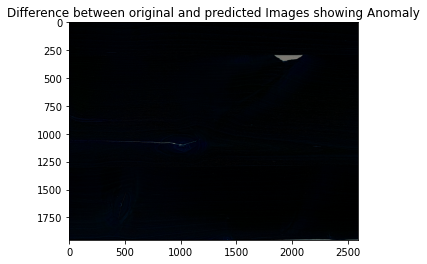

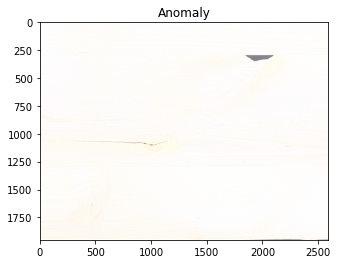

In [31]:
Anomaly_process = prediction5[0]-images[5]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0


plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

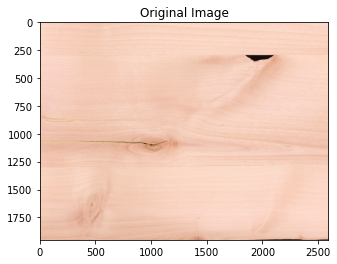

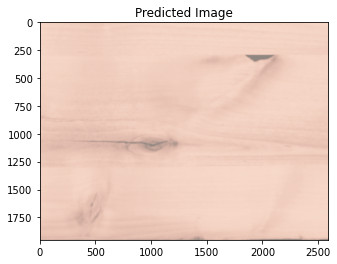

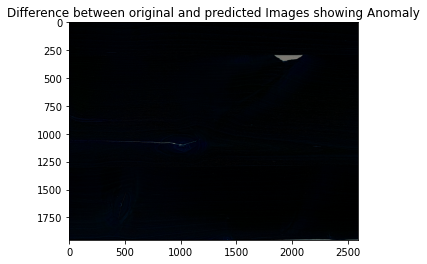

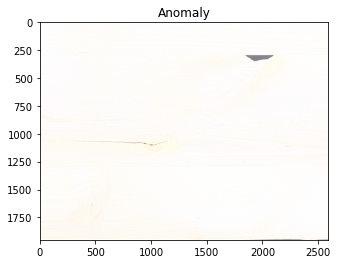

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


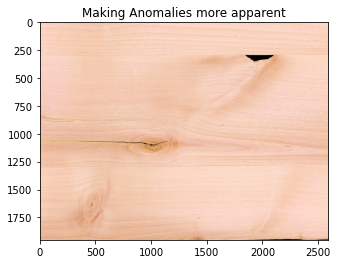

In [32]:
plt.imshow(images[5]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction5[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[5]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

Image 7

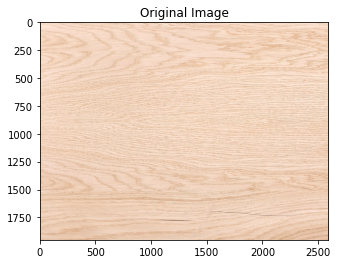

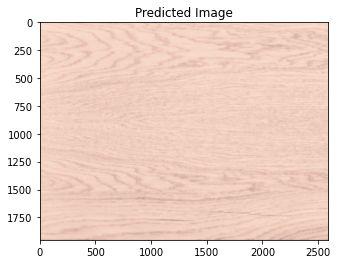

In [33]:
plt.imshow(images[6]/255)
plt.title("Original Image")
plt.show()

prediction6 = autoencoder.predict(images[[6]]/255)
plt.imshow(prediction6[0])
plt.title("Predicted Image")
plt.show()

Two lines can be seen in the bottom. 

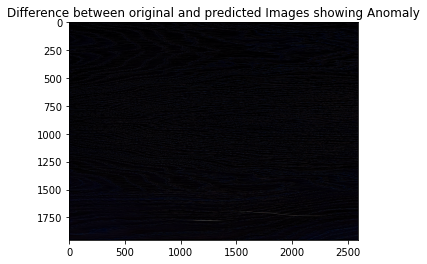

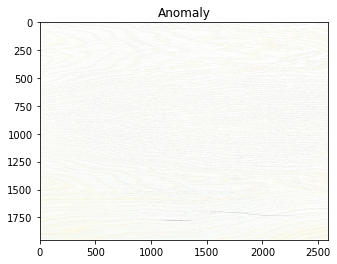

In [34]:
Anomaly_process = prediction6[0]-images[6]/255

## Process image in the range 0 to 1 (0 to 255)
for i in range(len(Anomaly_process)):
  for j in range(len(Anomaly_process[0])):
    for k in range(len(Anomaly_process[0][0])):

      if (Anomaly_process[i][j][k] > 1):
        Anomaly_process[i][j][k] = 1
      
      if (Anomaly_process[i][j][k] < 0):
        Anomaly_process[i][j][k] = 0


plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

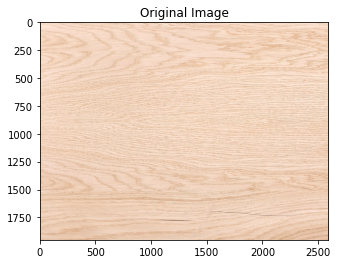

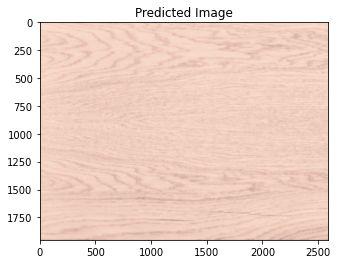

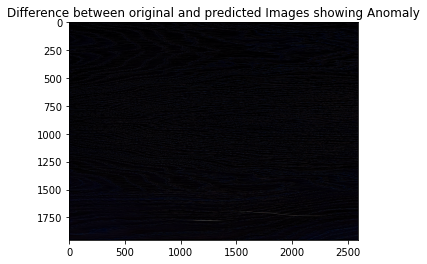

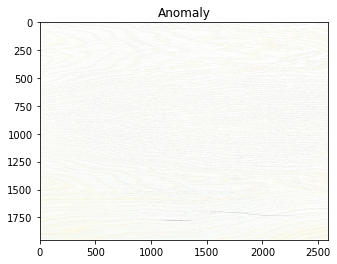

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


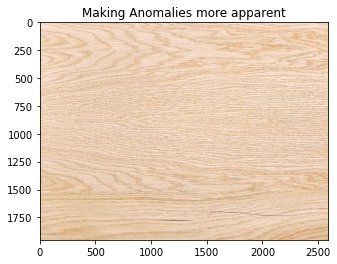

In [35]:
plt.imshow(images[6]/255)
plt.title("Original Image")
plt.show()

plt.imshow(prediction6[0])
plt.title("Predicted Image")
plt.show()

plt.imshow(Anomaly_process)
plt.title("Difference between original and predicted Images showing Anomaly")
plt.show()

plt.imshow(1-Anomaly_process)
plt.title("Anomaly")
plt.show()

plt.imshow(images[6]/255 - Anomaly_process)
plt.title("Making Anomalies more apparent")
plt.show()

One of the problem for this model is, it gives good anomalies when there are spots present but gives texture when there is not. This is because it is supposed to lose some information. Even after losing some information, if you overtrain it, it won't be able to detect anomalies too. This is because the model does not have enough redundancy. This could be fixed by adding more images. More images would train model further by learning which information is important to keep and which is not. 

Transfer learning could be used for other surfaces too because it has learnt to uderstand texture. It could understand texture, and if there is anomaly in a texture, it could identify. Transfer learning could be done by using the weights from this model to a new model. 